In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [2]:
data_frame = pd.read_csv("WineQT.csv")

In [3]:
print("First 5 rows of the dataset:")
data_frame.head()

First 5 rows of the dataset:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [4]:
print("Last 5 rows of the dataset:")
data_frame.tail()

Last 5 rows of the dataset:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595
1142,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1597


In [5]:
print(f'Dataset have {data_frame.shape[0]} rows and {data_frame.shape[1]} columns')

Dataset have 1143 rows and 13 columns


In [6]:
print("Information about the dataset:")
data_frame.info()

Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [7]:
data_frame.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

In [8]:
data_frame.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
Id                        int64
dtype: object

In [9]:
print("Summary statistics for numeric columns")
data_frame.describe().T

Summary statistics for numeric columns


,count,mean,std,min,25%,50%,75%,max
fixed acidity,1143.0,8.311111,1.747595,4.60000,7.10000,7.90000,9.100000,15.90000
volatile acidity,1143.0,0.531339,0.179633,0.12000,0.39250,0.52000,0.640000,1.58000
citric acid,1143.0,0.268364,0.196686,0.00000,0.09000,0.25000,0.420000,1.00000
residual sugar,1143.0,2.532152,1.355917,0.90000,1.90000,2.20000,2.600000,15.50000
chlorides,1143.0,0.086933,0.047267,0.01200,0.07000,0.07900,0.090000,0.61100
free sulfur dioxide,1143.0,15.615486,10.250486,1.00000,7.00000,13.00000,21.000000,68.00000
total sulfur dioxide,1143.0,45.914698,32.782130,6.00000,21.00000,37.00000,61.000000,289.00000
density,1143.0,0.996730,0.001925,0.99007,0.99557,0.99668,0.997845,1.00369
pH,1143.0,3.311015,0.156664,2.74000,3.20500,3.31000,3.400000,4.01000
sulphates,1143.0,0.657708,0.170399,0.33000,0.55000,0.62000,0.730000,2.00000


In [10]:
#data_frame = data_frame.drop("Id",axis=1)

Checking for missing values

In [11]:
missing_values = data_frame.isnull().sum()
print("Missing values in each column: ")
print(missing_values)

Missing values in each column: 
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64


OBSERVATION: no missing values

In [12]:
duplicate_rows = data_frame.duplicated().sum()
print("Number of duplicate rows: ", duplicate_rows)

Number of duplicate rows:  0


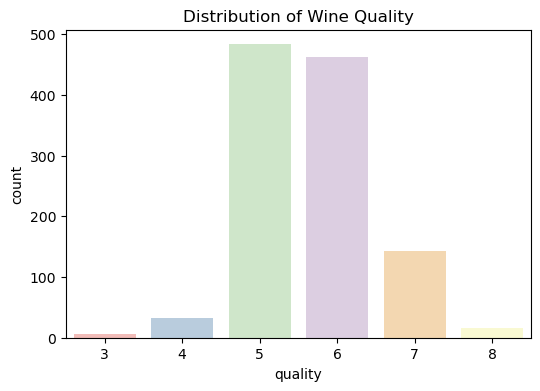

In [13]:
plt.figure(figsize=(6, 4))
sns.countplot(x='quality', data=data_frame, palette='Pastel1')
plt.title("Distribution of Wine Quality")
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


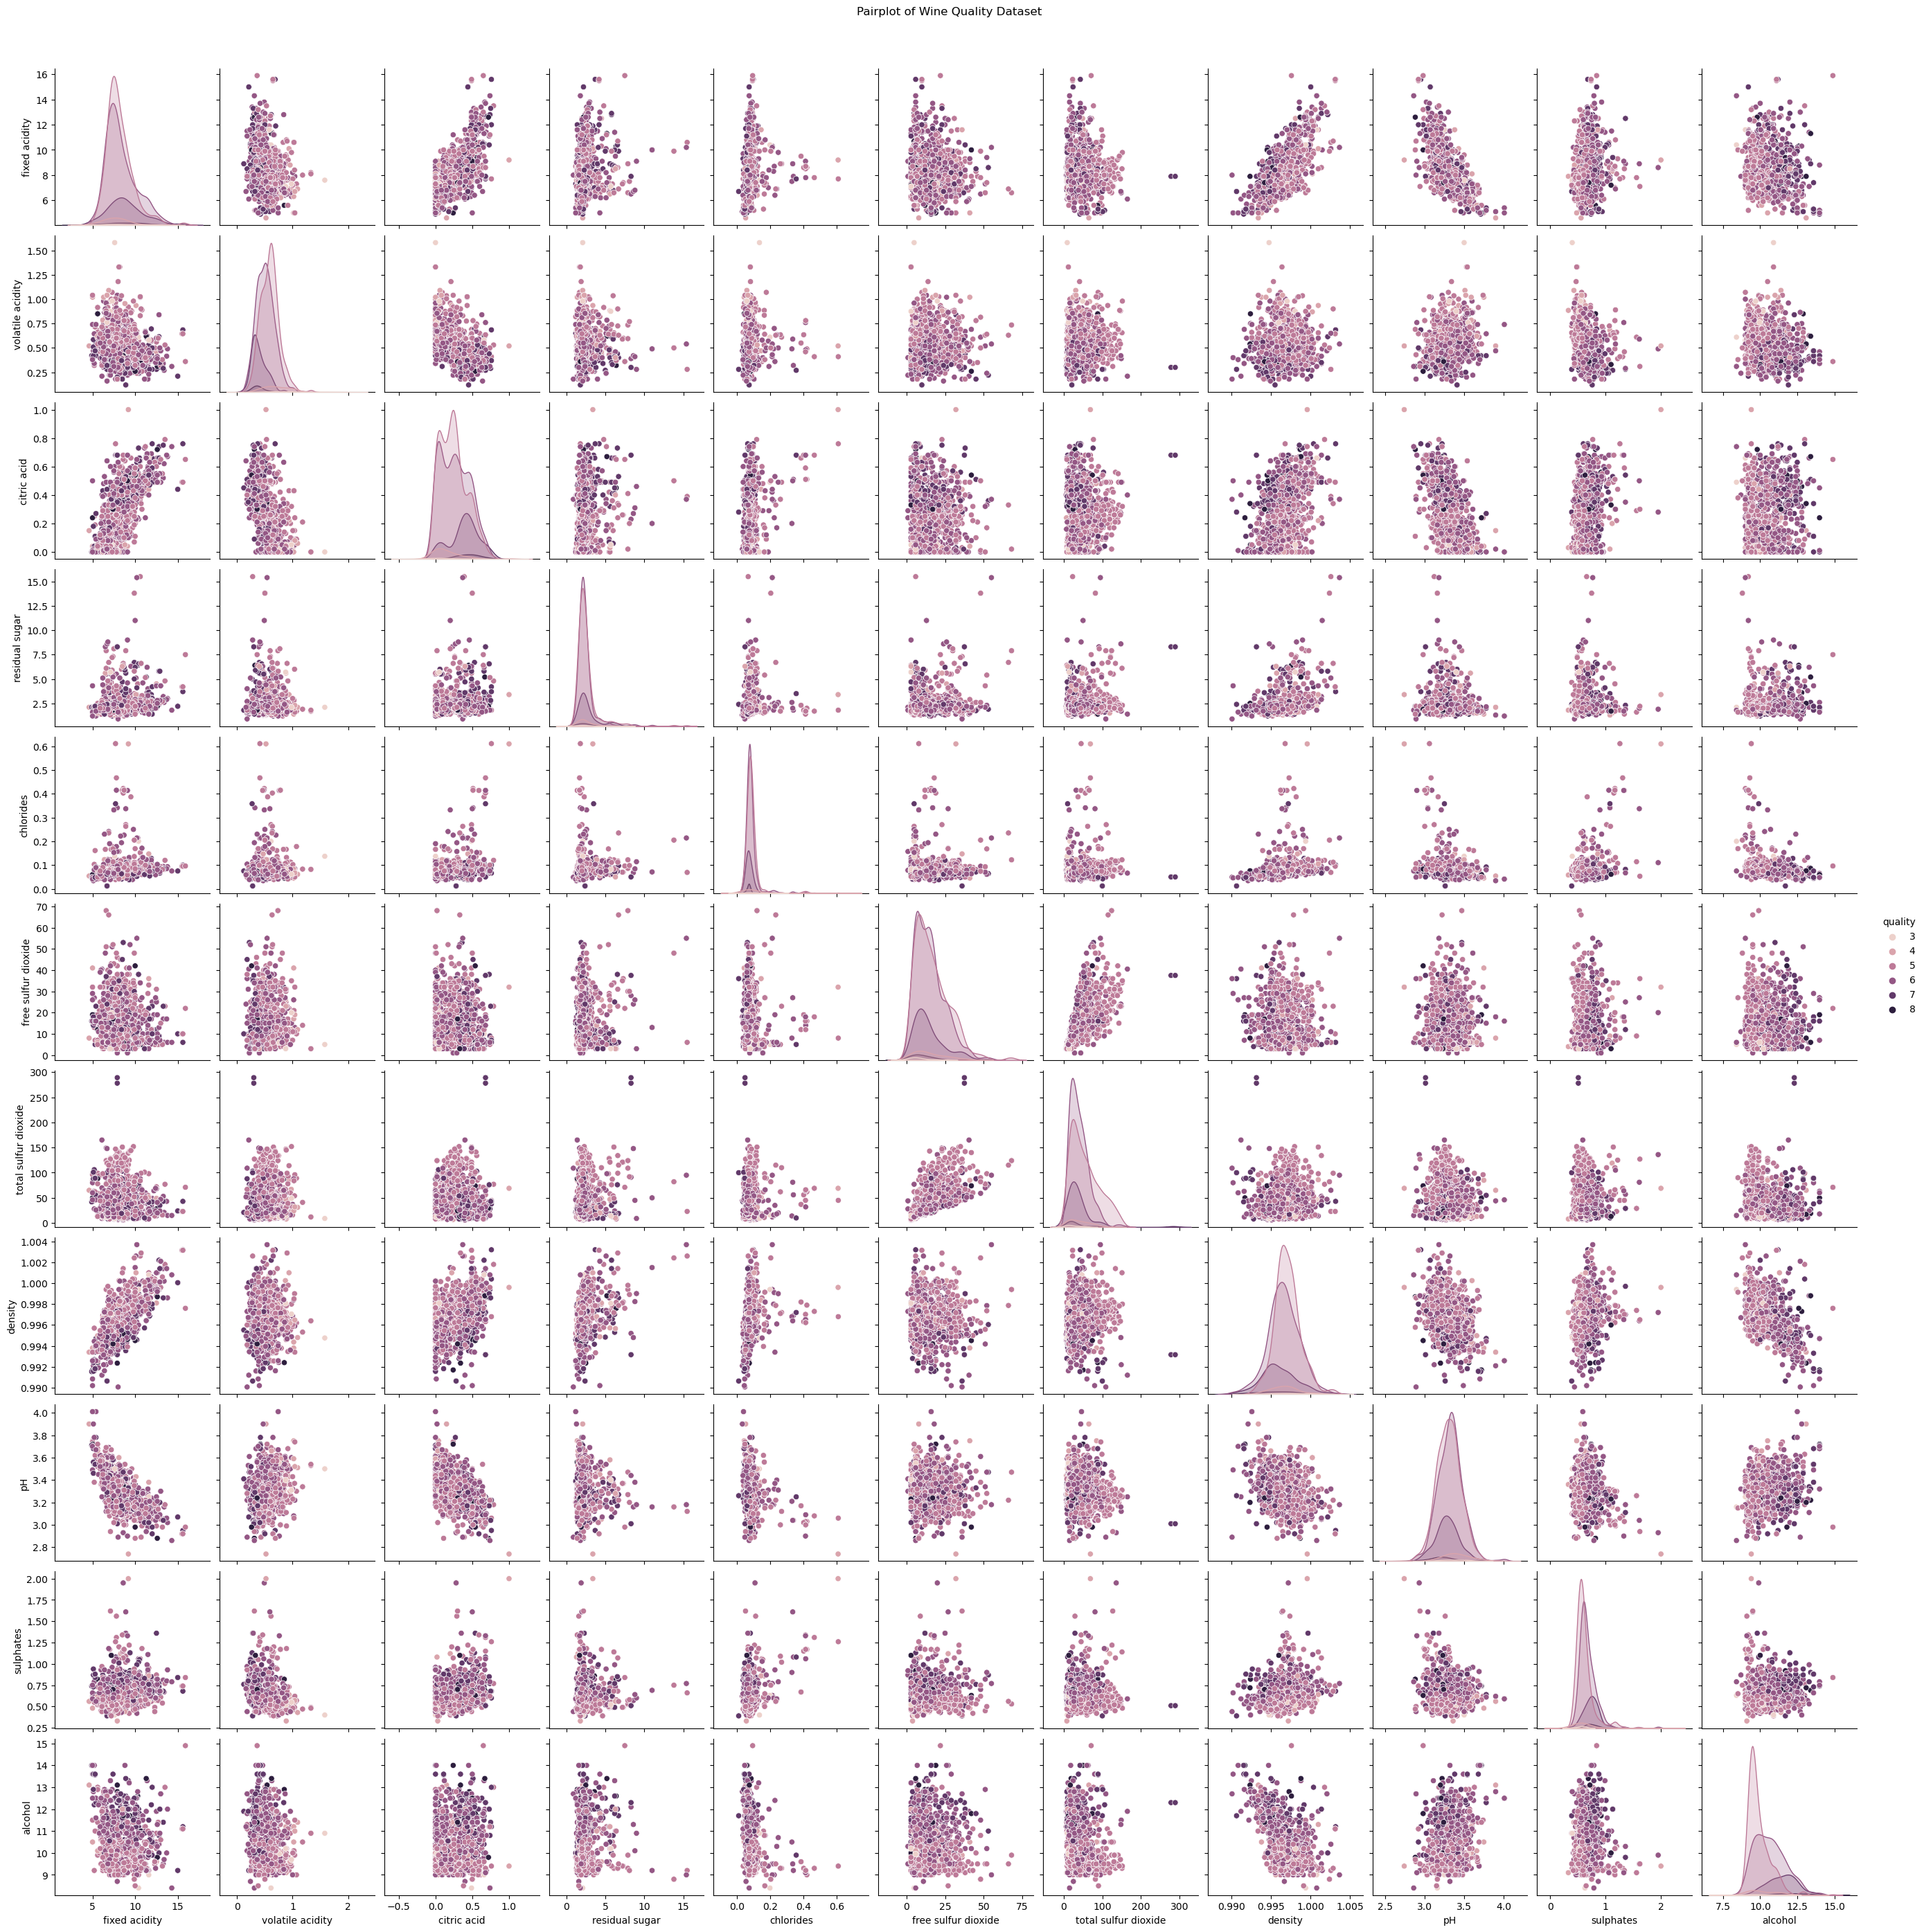

In [14]:
# Pairplot to visualize relationships between different features
sns.pairplot(data_frame, vars=data_frame.columns[:-2], hue='quality')
plt.suptitle("Pairplot of Wine Quality Dataset", y=1.02)
plt.show()

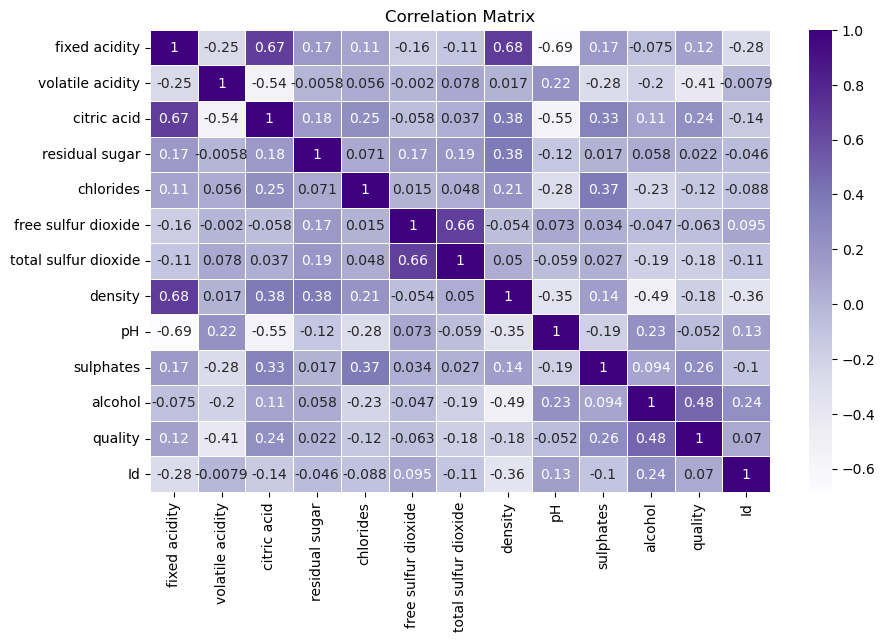

In [15]:
# Visualize the correlation between features and quality
plt.figure(figsize=(10, 6))
sns.heatmap(data_frame.corr(), annot=True, cmap='Purples', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Splitting the data

In [16]:
X = data_frame.drop(['quality', 'Id'], axis=1)
y = data_frame['quality']

In [17]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [19]:
y

0       5
1       5
2       5
3       6
4       5
       ..
1138    6
1139    6
1140    5
1141    6
1142    5
Name: quality, Length: 1143, dtype: int64

In [20]:
# Function to calculate metrics and confusion matrix
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)
    return accuracy, precision, recall, f1, cm

In [21]:
# Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
rf_accuracy, rf_precision, rf_recall, rf_f1, rf_cm = evaluate_model(rf_clf, X_test, y_test)

C:\Users\ayush\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [22]:
print("Random Forest Classifier:")
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1 Score:", rf_f1)
print("Confusion Matrix:")
print(rf_cm)

Random Forest Classifier:
Accuracy: 0.7030567685589519
Precision: 0.6775761436323177
Recall: 0.7030567685589519
F1 Score: 0.6893187631926734
Confusion Matrix:
[[ 0  3  3  0  0]
 [ 0 77 18  1  0]
 [ 0 27 66  6  0]
 [ 0  0  8 18  0]
 [ 0  0  2  0  0]]


In [23]:
# Stochastic Gradient Descent Classifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)
sgd_accuracy, sgd_precision, sgd_recall, sgd_f1, sgd_cm = evaluate_model(sgd_clf, X_test, y_test)

C:\Users\ayush\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [24]:
print("\nStochastic Gradient Descent Classifier:")
print("Accuracy:", sgd_accuracy)
print("Precision:", sgd_precision)
print("Recall:", sgd_recall)
print("F1 Score:", sgd_f1)
print("Confusion Matrix:")
print(sgd_cm)


Stochastic Gradient Descent Classifier:
Accuracy: 0.4585152838427948
Precision: 0.475918314924223
Recall: 0.4585152838427948
F1 Score: 0.3351757122062799
Confusion Matrix:
[[ 0  5  1  0  0]
 [ 0 94  2  0  0]
 [ 0 86  5  8  0]
 [ 0 19  1  6  0]
 [ 0  0  0  2  0]]


In [25]:
# Support Vector Classifier (SVC)
svc_clf = SVC(kernel='linear', random_state=42)
svc_clf.fit(X_train, y_train)
svc_accuracy, svc_precision, svc_recall, svc_f1, svc_cm = evaluate_model(svc_clf, X_test, y_test)

C:\Users\ayush\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [26]:
print("\nSupport Vector Classifier:")
print("Accuracy:", svc_accuracy)
print("Precision:", svc_precision)
print("Recall:", svc_recall)
print("F1 Score:", svc_f1)
print("Confusion Matrix:")
print(svc_cm)


Support Vector Classifier:
Accuracy: 0.611353711790393
Precision: 0.5208503287105908
Recall: 0.611353711790393
F1 Score: 0.5624790057104468
Confusion Matrix:
[[ 0  3  3  0  0]
 [ 0 74 22  0  0]
 [ 0 33 66  0  0]
 [ 0  2 24  0  0]
 [ 0  0  2  0  0]]


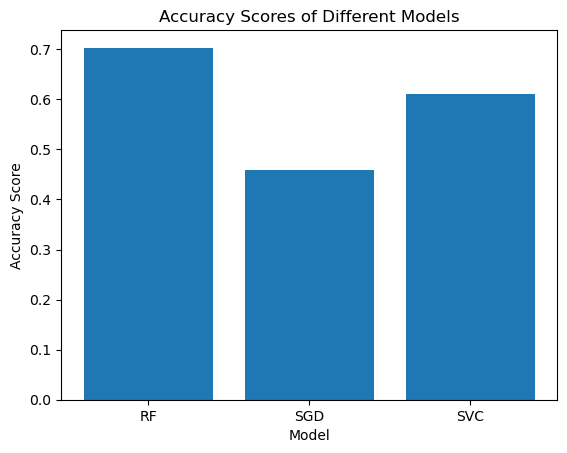

In [28]:
Model = ['RF', 'SGD', 'SVC']
Score = [rf_accuracy, sgd_accuracy, svc_accuracy]

# Create bar plot
barplot = plt.bar(x=Model, height=Score)
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores of Different Models')
plt.show()